# Time Series
Time series merupakan serangkaian pengamatan terhadap suatu peristiwa, kejadian, gejala atau perubahan yang terjadi dari waktu ke waktu. Sebagai contoh yaitu data yang dikumpulkan terkait dengan satuan waktu yaitu jam, hari, minggu, bulan, tahun, maupun semester dan data yang diamati sepanjang waktu. Pola data time series digunakan untuk menganalisis data masa lalu yang akan digunakan untuk meramalkan suatu nilai atau kejadian pada masa yang akan datang.

# Import Library

In [ ]:
import sys
!{sys.executable} -m pip install pmdarima

In [ ]:
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Pembacaan Data
beras = pd.read_csv('C:/Users/asus/Desktop/Semester 5/DSDA/Prak/Prak 10/Supply_Beras.csv',index_col='Periode', parse_dates=True, sep = ';')
print(beras.shape)
print(beras.head())

(48, 1)
            Produksi
Periode             
2017-01-01    808181
2017-02-01    803341
2017-03-01    802040
2017-04-01    788637
2017-05-01    775817


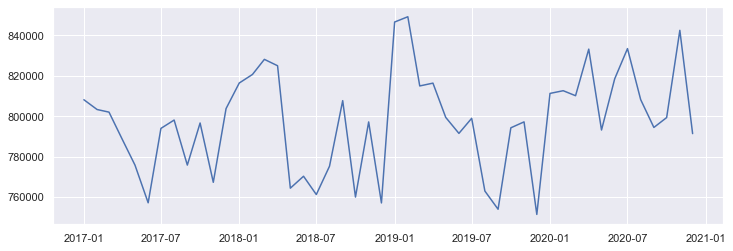

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(beras.index, beras['Produksi'])

In [ ]:
#Pemisahan data
train = beras[:40]
test = beras[40:]

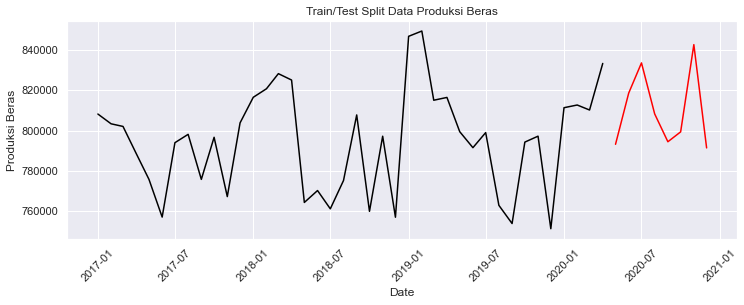

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Produksi Beras')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test Split Data Produksi Beras")
plt.show()

# Value p d q

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

In [ ]:
data = beras['Produksi']
data.head()

Periode
2017-01-01    808181
2017-02-01    803341
2017-03-01    802040
2017-04-01    788637
2017-05-01    775817
Name: Produksi, dtype: int64

Determine the value of p and q

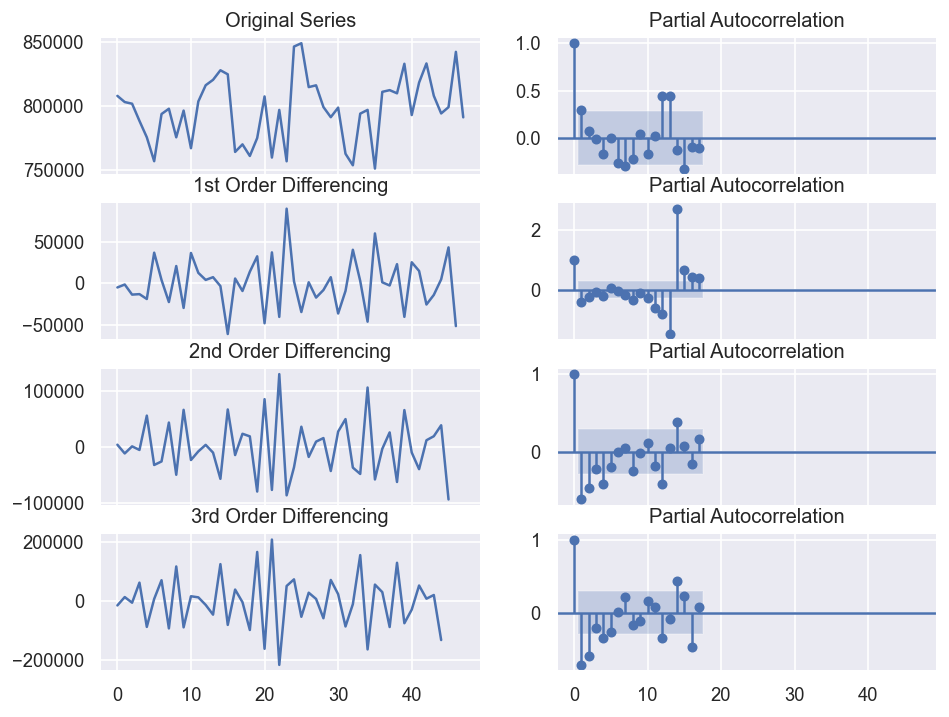

In [ ]:
# axes[1].set(ylim=(0,5))
fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(data.values); axes[0, 0].set_title('Original Series')
plot_pacf(data.values, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(data.values)); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(np.diff(data.values), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(np.diff(np.diff(data.values))); axes[2, 0].set_title('2nd Order Differencing')
plot_pacf(np.diff(np.diff(data.values)), ax=axes[2, 1])

# 3rd Differencing
axes[3, 0].plot(np.diff(np.diff(np.diff(data.values)))); axes[3, 0].set_title('3rd Order Differencing')
plot_pacf(np.diff(np.diff(np.diff(data.values))), ax=axes[3, 1])

plt.show()

Determine the value of d

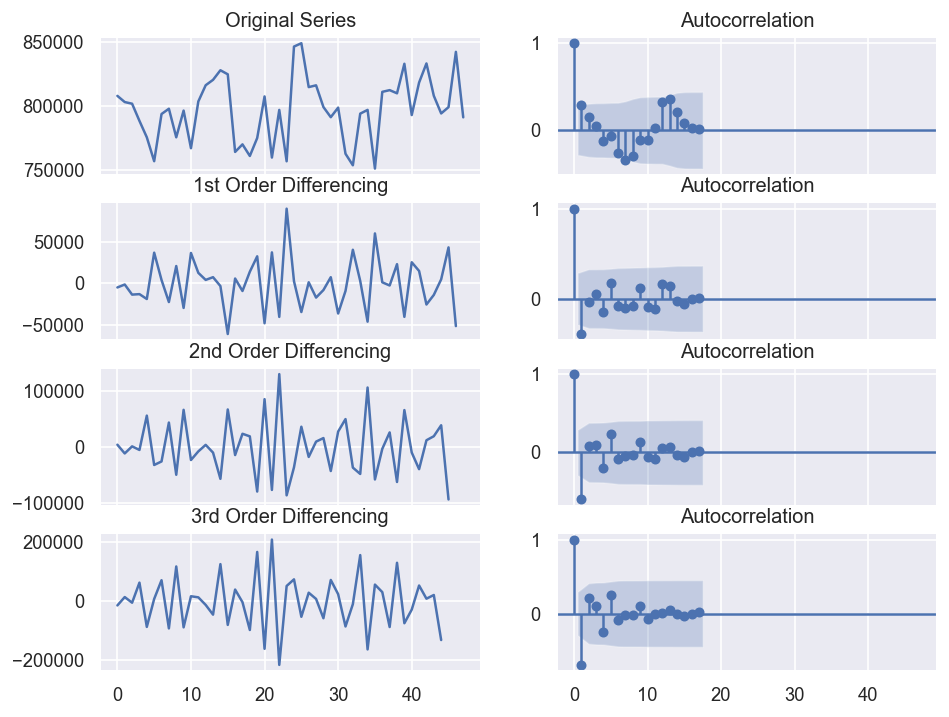

In [ ]:
# Original Series
fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(data.values); axes[0, 0].set_title('Original Series')
plot_acf(data.values, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(data.values)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(data.values), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(np.diff(np.diff(data.values))); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(np.diff(data.values)), ax=axes[2, 1])


# 3rd Differencing
axes[3, 0].plot(np.diff(np.diff(np.diff(data.values)))); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(np.diff(np.diff(np.diff(data.values))), ax=axes[3, 1])

plt.show()

# ARMA
Metode Autoregressive Moving Average (ARMA) memodelkan langkah berikutnya dalam urutan sebagai fungsi linier dari pengamatan dan kesalahan residual pada deret waktu sebelumnya. Metode ini menggabungkan kedua model Autoregression (AR) dan Moving Average (MA).


In [ ]:
y = train['Produksi']
ARMAmodel = SARIMAX(y, order = (1, 0, 1)) # order 101 bertujuan untuk menjadikan sama rata
ARMAmodel = ARMAmodel.fit()
y_pred_ARMA = ARMAmodel.get_forecast(15) # parameter PDI perhitungan moving Average
y_pred_df_ARMA = y_pred_ARMA.conf_int(alpha = 0.05) 
y_pred_df_ARMA["Predictions"] = ARMAmodel.predict(start = y_pred_df_ARMA.index[0], end = y_pred_df_ARMA.index[-1])
y_pred_out_ARMA = y_pred_df_ARMA["Predictions"] 

In [ ]:
#Mencetak dan memvisualisasikan hasil prediksi metode ARMA
y_pred_out_ARMA

2020-05-01    819426.779670
2020-06-01    819302.225036
2020-07-01    819177.689334
2020-08-01    819053.172562
2020-09-01    818928.674717
2020-10-01    818804.195796
2020-11-01    818679.735796
2020-12-01    818555.294714
2021-01-01    818430.872548
2021-02-01    818306.469294
2021-03-01    818182.084949
2021-04-01    818057.719511
2021-05-01    817933.372977
2021-06-01    817809.045344
2021-07-01    817684.736609
Freq: MS, Name: Predictions, dtype: float64

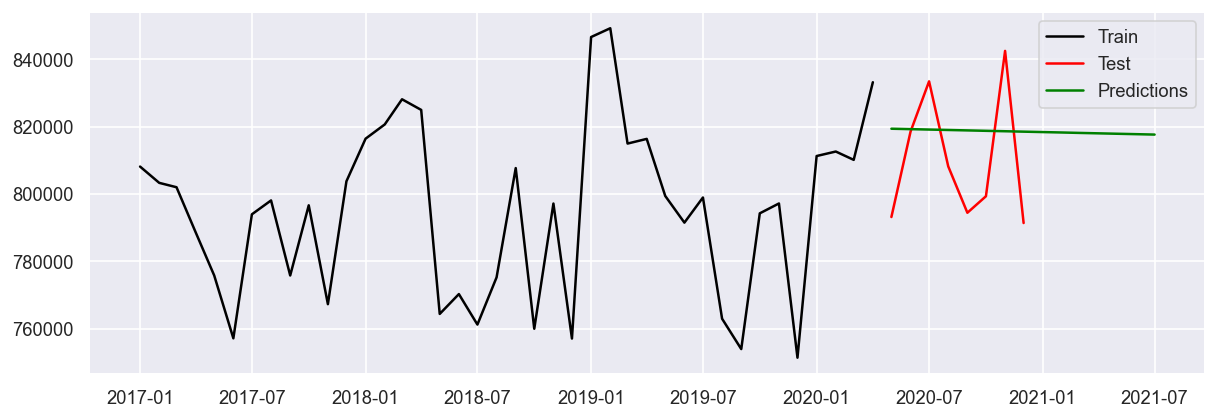

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train, color = "black", label = "Train")
plt.plot(test, color = "red", label = "Test")
plt.plot(y_pred_out_ARMA, color='green', label = 'Predictions')
plt.legend()

In [ ]:
arma_rmse = np.sqrt(mean_squared_error(y_pred_df_ARMA["Predictions"].values, y_pred_df_ARMA["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  0.0


# ARIMA
Metode Autoregressive Integrated Moving Average (ARIMA) memodelkan deret waktu berikutnya dalam urutan sebagai fungsi linier dari pengamatan yang berbeda dan kesalahan residual pada deret waktu sebelumnya. Metode ini menggabungkan kedua model Autoregression (AR) dan Moving Average (MA) serta langkah pra-pemrosesan diferensial dari urutan untuk membuat urutan stasioner, yang disebut integrasi (I).

In [ ]:
#Implementasi metode ARIMA
ARIMAmodel = ARIMA(y, order = (1, 0, 1))
ARIMAmodel = ARIMAmodel.fit()

y_pred_ARIMA = ARIMAmodel.get_forecast(15)
y_pred_df_ARIMA = y_pred_ARIMA.conf_int(alpha = 0.05) 
y_pred_df_ARIMA["Predictions"] = ARIMAmodel.predict(start = y_pred_df_ARIMA.index[0], end = y_pred_df_ARIMA.index[-1])
y_pred_out_ARIMA = y_pred_df_ARIMA["Predictions"]

In [ ]:
#Mencetak dan memvisualisasikan hasil prediksi metode ARIMA
y_pred_out_ARIMA

2020-05-01    806960.204557
2020-06-01    799728.509049
2020-07-01    796858.819671
2020-08-01    795720.066370
2020-09-01    795268.185030
2020-10-01    795088.868979
2020-11-01    795017.712586
2020-12-01    794989.476228
2021-01-01    794978.271445
2021-02-01    794973.825151
2021-03-01    794972.060767
2021-04-01    794971.360623
2021-05-01    794971.082791
2021-06-01    794970.972541
2021-07-01    794970.928792
Freq: MS, Name: Predictions, dtype: float64

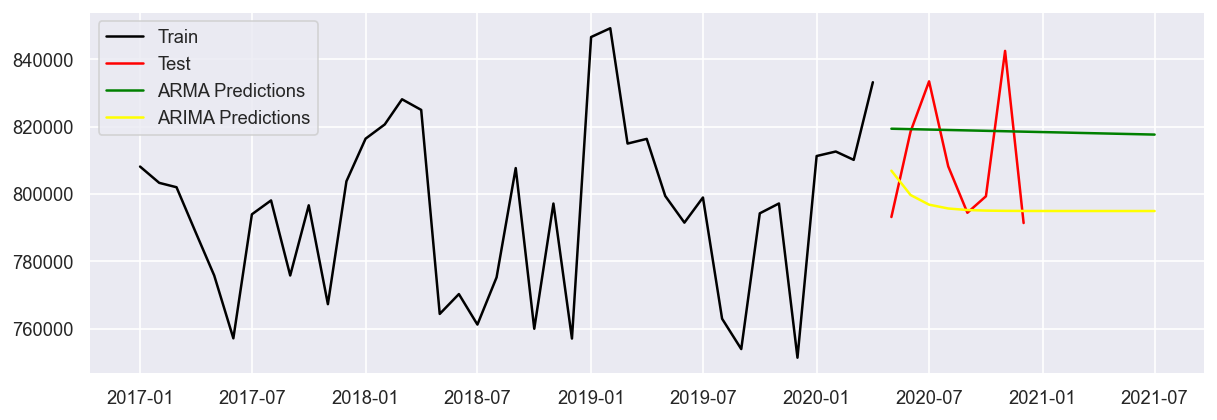

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train, color = "black", label = "Train")
plt.plot(test, color = "red", label = "Test")
plt.plot(y_pred_out_ARMA, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_out_ARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.legend()

In [ ]:
arima_rmse = np.sqrt(mean_squared_error(y_pred_df_ARMA["Predictions"].values, y_pred_df_ARIMA["Predictions"]))
print("RMSE: ",arima_rmse)

RMSE:  22434.303581542074


# SARIMA
Seasonal Autoregressive Integrated Moving Average (SARIMA) merupakan pengembangan dari model Autoregressive Integrated Moving Average (ARIMA) padadata runtun waktu yang memiliki pola musiman.

In [ ]:
#Implementasi SARIMA
SARIMAXmodel = SARIMAX(y, order = (1, 0, 1), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred_SARIMA = SARIMAXmodel.get_forecast(15)
y_pred_df_SARIMA = y_pred_SARIMA.conf_int(alpha = 0.05) 
y_pred_df_SARIMA["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_SARIMA.index[0], end = y_pred_df_SARIMA.index[-1])
y_pred_out_SARIMA = y_pred_df_SARIMA["Predictions"] 

In [ ]:
#Mencetak dan memvisualisasikan hasil prediksi metode SARIMA
y_pred_out_SARIMA

2020-05-01    787937.275213
2020-06-01    780869.320863
2020-07-01    790433.710501
2020-08-01    745018.264540
2020-09-01    735997.808302
2020-10-01    789777.536108
2020-11-01    796487.863846
2020-12-01    736878.698408
2021-01-01    796166.898539
2021-02-01    799506.305244
2021-03-01    798381.172824
2021-04-01    829995.335335
2021-05-01    779005.030039
2021-06-01    771739.181919
2021-07-01    785224.986651
Freq: MS, Name: Predictions, dtype: float64

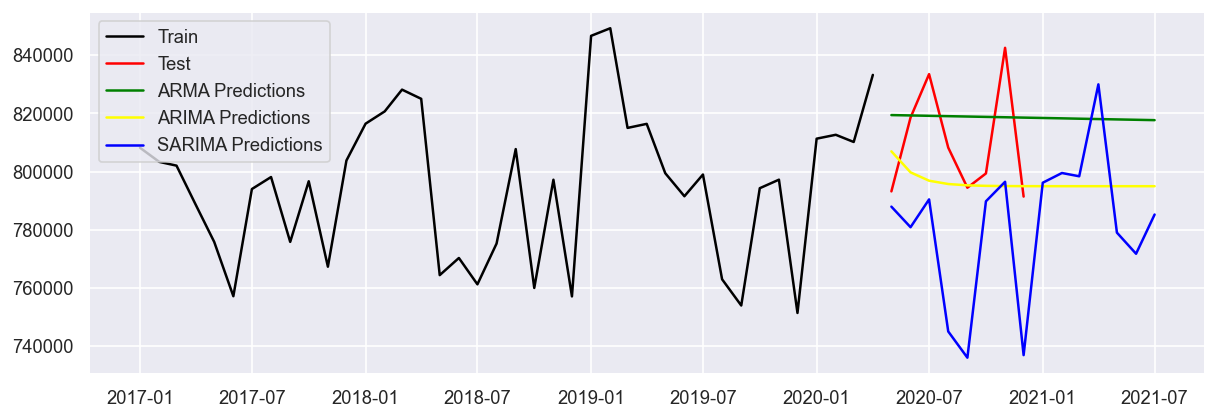

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train, color = "black", label = "Train")
plt.plot(test, color = "red", label = "Test")
plt.plot(y_pred_out_ARMA, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_out_ARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_out_SARIMA, color='Blue', label = 'SARIMA Predictions')
plt.legend()

In [ ]:
sarima_rmse = np.sqrt(mean_squared_error(y_pred_df_ARMA["Predictions"].values, y_pred_df_SARIMA["Predictions"]))
print("SARIMA RMSE: ",sarima_rmse)

SARIMA RMSE:  44523.3116077321


# Holt Winters
Import Library

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error,mean_squared_error
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Membaca data
beras = pd.read_csv('C:/Users/asus/Desktop/Semester 5/DSDA/Prak/Prak 10/Supply_Beras.csv',index_col='Periode', parse_dates=True, sep = ';')
print(beras.shape)
print(beras.head())

(48, 1)
            Produksi
Periode             
2017-01-01    808181
2017-02-01    803341
2017-03-01    802040
2017-04-01    788637
2017-05-01    775817


<AxesSubplot:title={'center':'Produksi Beras'}, xlabel='Periode'>

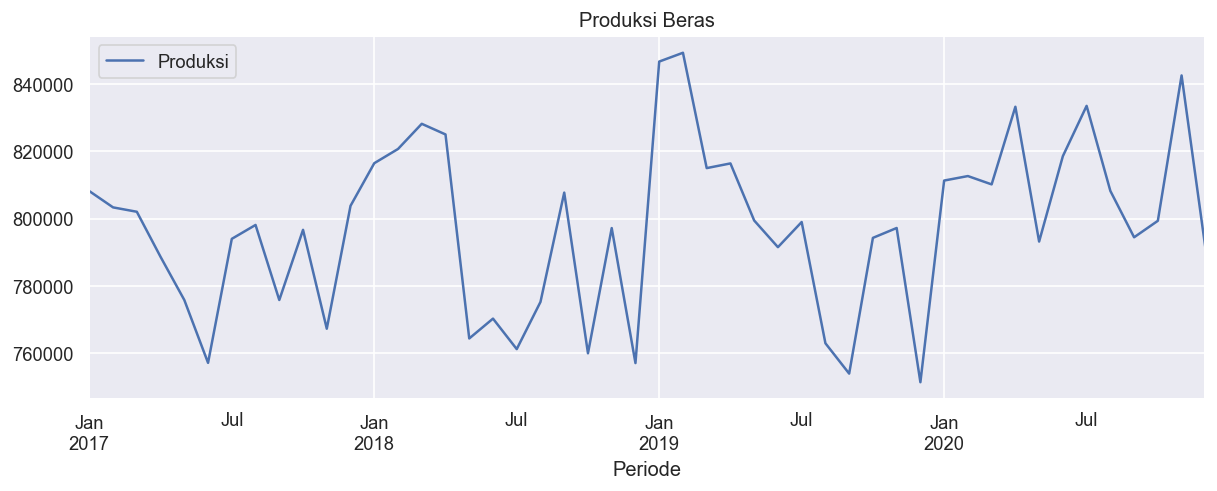

In [ ]:
beras[['Produksi']].plot(title='Produksi Beras', figsize = (12,4))

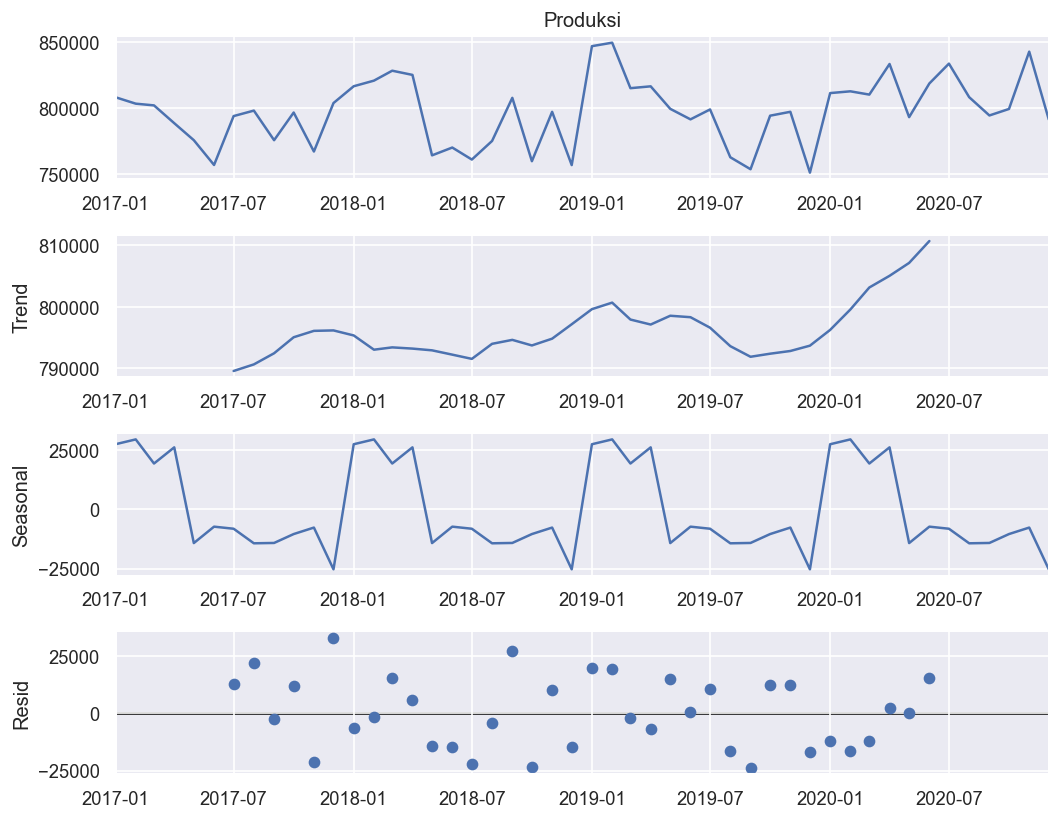

In [ ]:
#Melihat pola trend dan trend musiman
decompose_result = seasonal_decompose(beras['Produksi'],model='additive')
decompose_result.plot();

In [ ]:
# Mengatur frekuensi datatime
# Tujuannya untuk menetapkan parameter index time series sebelum diolah lebih lanjut
beras.index.freq = 'MS'
m = 12
alpha = 1/(2*m)

# Single Exponential Smoothing
Single Exponential Smoothing merupakan metode peramalan yang digunakan untuk data stasioner atau data yang relatif stabil.

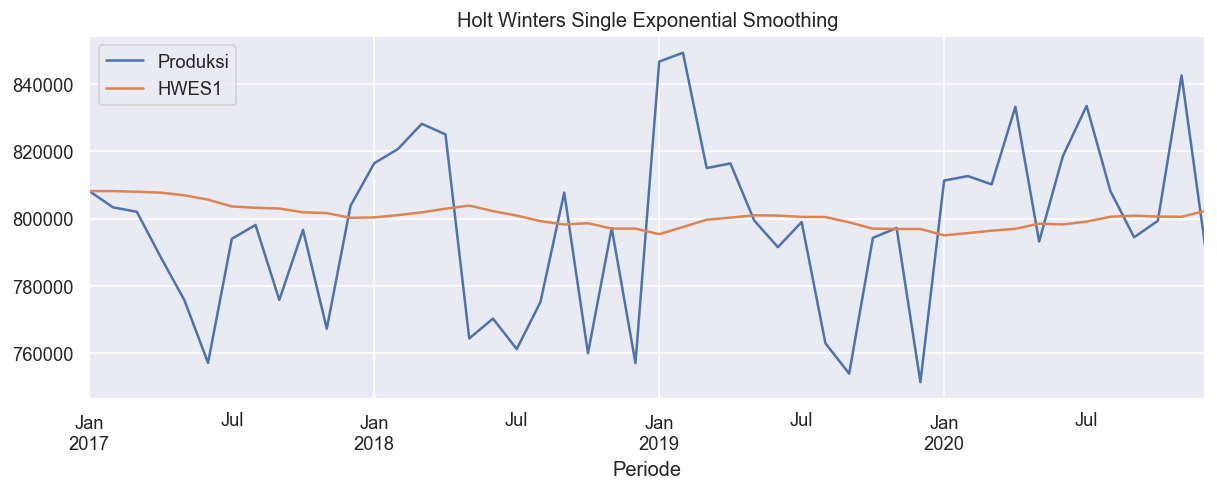

In [ ]:
beras['HWES1'] = SimpleExpSmoothing(beras['Produksi']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
beras[['Produksi','HWES1']].plot(title='Holt Winters Single Exponential Smoothing', figsize=(12,4));

# Double Exponential Smoothing
Double Exponential Smoothing digunakan untuk data yang memiliki tren atau data yang memiliki kecenderungan peningkatan atau penurunan dalam jangka panjang.

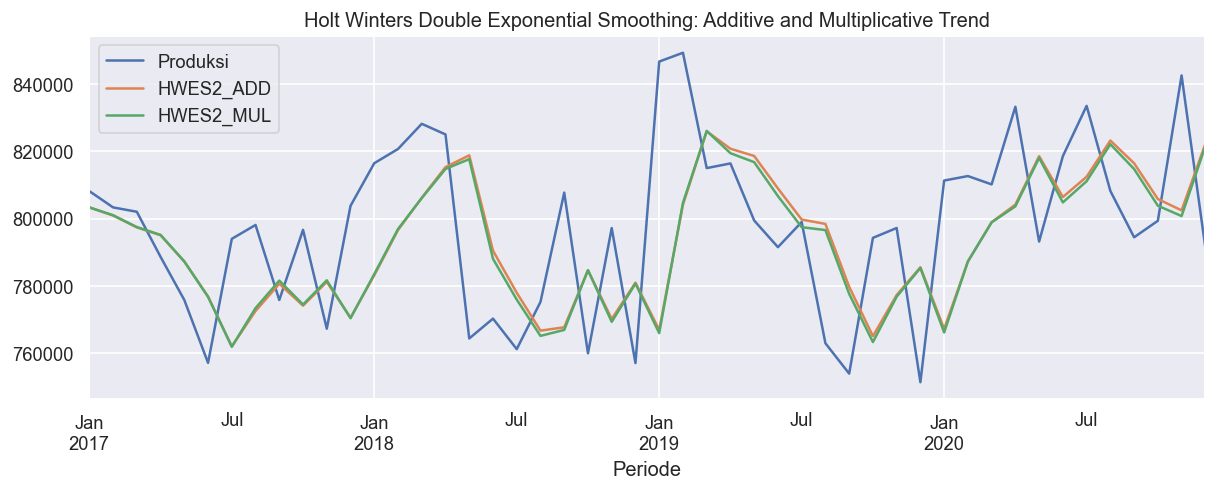

In [ ]:
beras['HWES2_ADD'] = ExponentialSmoothing(beras['Produksi'],trend='add').fit().fittedvalues
beras['HWES2_MUL'] = ExponentialSmoothing(beras['Produksi'],trend='mul').fit().fittedvalues
beras[['Produksi','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend', figsize = (12,4));

# Triple Exponential Smoothing
Double Exponential Smoothing digunakan untuk data yang memiliki tren atau data yang memiliki kecenderungan peningkatan atau penurunan dalam jangka panjang dan dipengaruhi oleh musim.

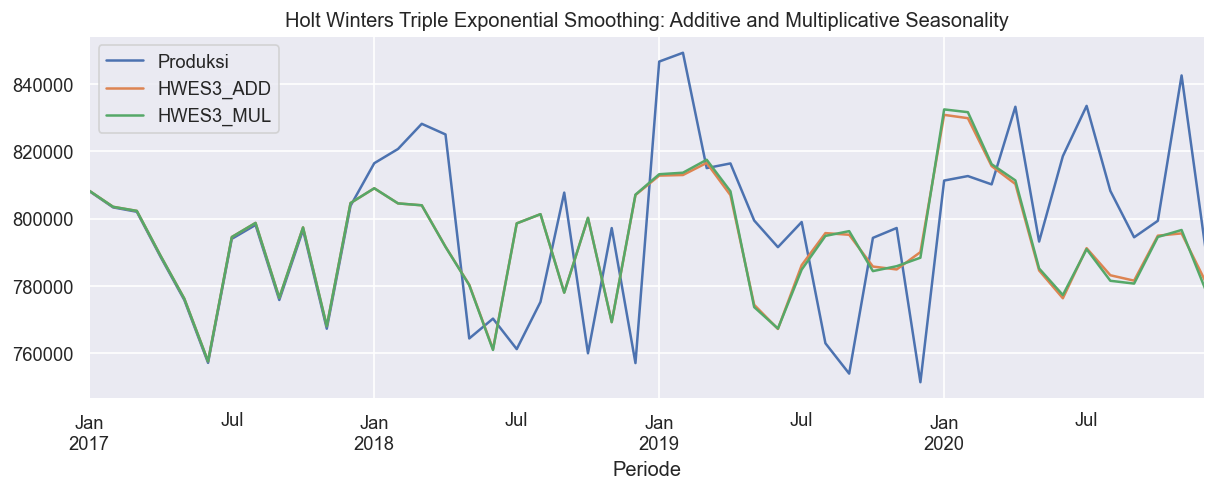

In [ ]:
beras['HWES3_ADD'] = ExponentialSmoothing(beras['Produksi'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
beras['HWES3_MUL'] = ExponentialSmoothing(beras['Produksi'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
beras[['Produksi','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality', figsize = (12,4));

In [ ]:
#Prediksi Data
f_prod= pd.read_csv('C:/Users/asus/Desktop/Semester 5/DSDA/Prak/Prak 10/Supply_Beras.csv',index_col='Periode', parse_dates=True, sep = ';')

In [ ]:
#Mengatur Frekuensi Datetime
f_prod.index.freq='MS'

In [ ]:
#Menampilkan dimensi prediksi data
f_prod.shape

(48, 1)

# Memisah Data dan Implementasi Triple Exponential Smoothing
Kenapa menggunakan Triple Exponential Smoothing? Karena data produksi beras dipengaruhi oleh musim

In [ ]:
train_prod = f_prod[:40]
test_prod = f_prod[40:]

Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

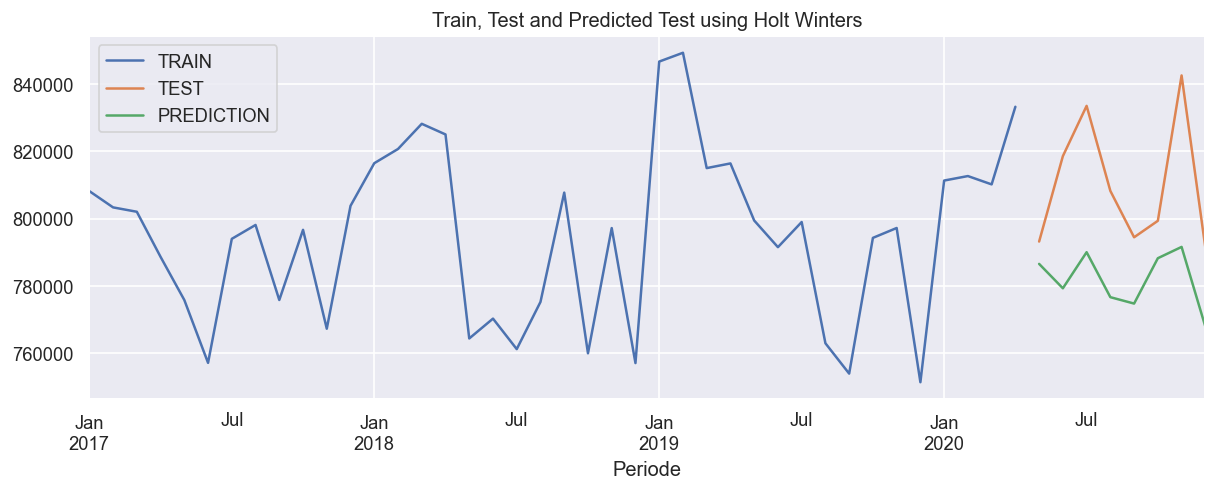

In [ ]:
fitted_model = ExponentialSmoothing(train_prod['Produksi'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(len(test_prod))
train_prod['Produksi'].plot(legend=True,label='TRAIN')
test_prod['Produksi'].plot(legend=True,label='TEST',figsize=(12,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

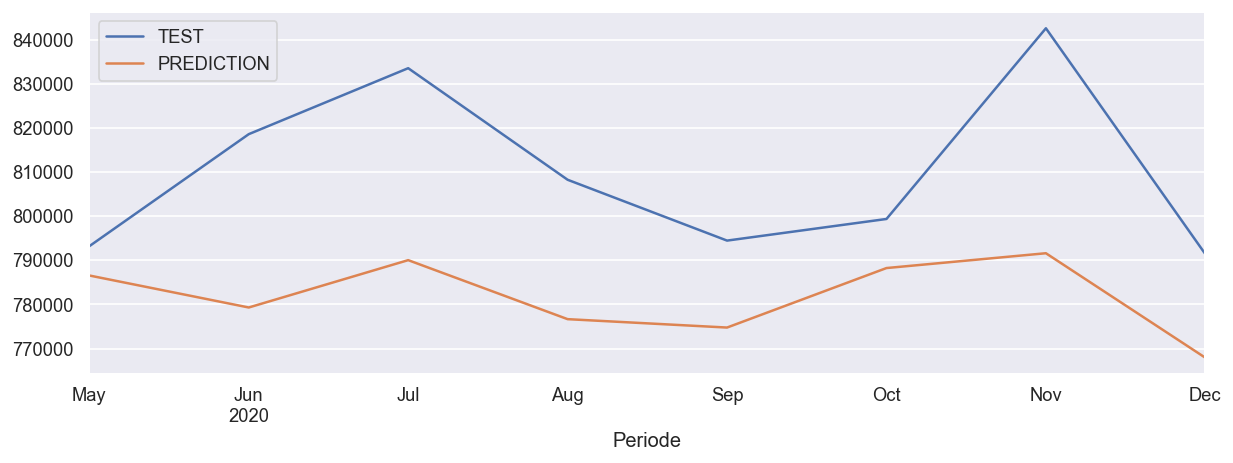

In [ ]:
#Visualisasi Hasil Prediksi
test_prod['Produksi'].plot(legend=True,label='TEST',figsize=(12,4))
test_predictions.plot(legend=True,label='PREDICTION');

In [ ]:
print(f'Mean Absolute Error = {mean_absolute_error(test_prod,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test_prod,test_predictions)}')

Mean Absolute Error = 28278.732970180994
Mean Squared Error = 1016794323.9722463


In [ ]:
f_prod.tail()

,Produksi
Periode,
2020-08-01,808237
2020-09-01,794454
2020-10-01,799353
2020-11-01,842555
2020-12-01,791401


# Prediksi dalam beberapa waktu ke depan
Kenapa dipilih mulai prediksi pada bulan Januari 2021? Karena data terakhir berada pada bulan Desember 2020

In [ ]:
prediksi = fitted_model.predict(start=datetime(2021,1,1), end = datetime(2021,5,1))

In [ ]:
#Mencetak hasil prediksi dan memvisualisasikan hasilnya
print(prediksi)

2021-01-01    822535.065885
2021-02-01    823778.754679
2021-03-01    814731.265145
2021-04-01    814585.724723
2021-05-01    787600.489025
Freq: MS, dtype: float64


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

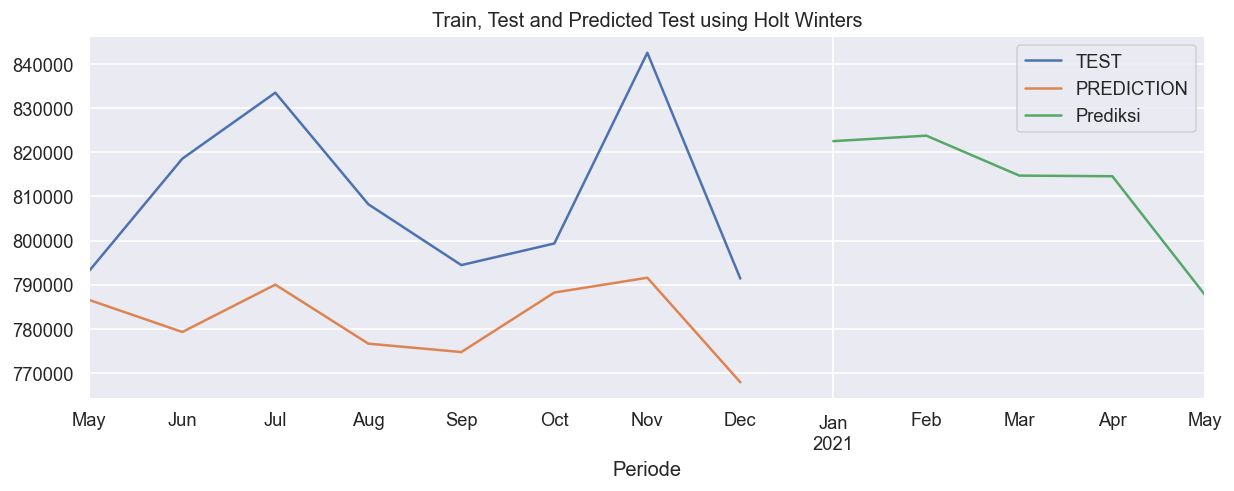

In [ ]:
test_prod['Produksi'].plot(legend=True,label='TEST',figsize=(12,4))
test_predictions.plot(legend=True,label='PREDICTION');
prediksi.plot(legend=True, label='Prediksi')
plt.title('Train, Test and Predicted Test using Holt Winters')